In [3]:
!pip install tensorflow

  Using cached pygments-2.17.2-py3-none-any.whl (1.2 MB)
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: h5py
    Found existing installation: h5py 3.2.1
    Uninstalling h5py-3.2.1:
      Successfully uninstalled h5py-3.2.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.4 which is incompatible.


  Using cached tensorflow-2.16.1-cp39-cp39-win_amd64.whl (2.1 kB)
  Using cached tensorflow_intel-2.16.1-cp39-cp39-win_amd64.whl (376.9 MB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl (413 kB)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.4 which is incompatible.



  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached grpcio-1.62.1-cp39-cp39-win_amd64.whl (3.8 MB)
  Using cached h5py-3.10.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-win_amd64.whl (127 kB)
  Using cached keras-3.2.0-py3-none-any.whl (1.1 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached optree-0.11.0-cp39-cp39-win_amd64.whl (240 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached namex-0.0.7-py3-

In [1]:
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense, \
    Conv2D, \
    MaxPooling2D, \
    Flatten, \
    BatchNormalization, \
    Dropout,\
    Rescaling
# from keras.preprocessing import ImageDataGenerator
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import random
import shutil

C:\Users\Joeri Van Cauwelaert\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
img_height = 256
img_width = 256
batch_size = 32

In [12]:
def split_dataset(input_folder, output_folder, train_percent, val_percent, test_percent):
    # Create output folders if they don't exist
    for folder in ['train', 'val', 'test']:
        os.makedirs(os.path.join(output_folder, folder), exist_ok=True)
    
    # List all files in the input folder
    files = os.listdir(input_folder)
    num_files = len(files)
    
    # Shuffle the list of files
    random.shuffle(files)
    
    # Calculate the number of files for each set
    train_split = int(train_percent * num_files)
    val_split = int(val_percent * num_files)
    test_split = int(test_percent * num_files)
    
    # Copy files to corresponding sets
    for i, file in enumerate(files):
        if i < train_split:
            shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, 'train', file))
        elif i < train_split + val_split:
            shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, 'val', file))
        else:
            shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, 'test', file))

# Example usage:
input_folder = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\Images\\StandingPelvicR'
output_folder = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\SplittedImages'
train_percent = 0.6
val_percent = 0.2
test_percent = 0.2

split_dataset(input_folder, output_folder, train_percent, val_percent, test_percent)

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\SplittedImages\\train',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\SplittedImages\\val',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\SplittedImages\\test',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height,img_width)
)

Found 1440 files belonging to 4 classes.
Found 480 files belonging to 4 classes.
Found 480 files belonging to 4 classes.


In [4]:
val_batches = tf.data.experimental.cardinality(validation_ds)

In [5]:
class_names = train_ds.class_names
class_names

['Sitting', 'SittingPelvicR', 'Standing', 'StandingPelvicR']

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


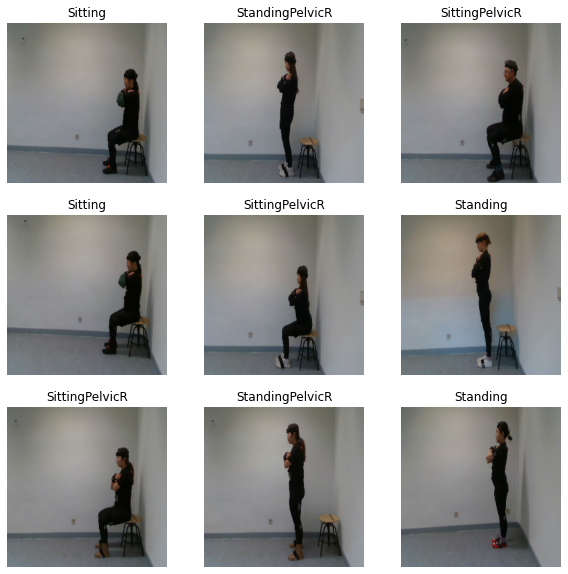

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [8]:
IMG_SIZE = 256

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255, offset=-1)
])

In [9]:
IMG_SHAPE = (img_height, img_width) + (3,)
IMG_SHAPE

(256, 256, 3)

In [10]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical", 
                      input_shape=(img_height,
                                   img_width,
                                   1)),
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.1), 
    layers.RandomContrast(0.2),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomHeight(0.1), 
    layers.RandomWidth(0.1), 
    layers.RandomBrightness(0.2),    
  ]
)

In [27]:
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                                  include_top=False,
                                                  weights='imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step


In [28]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)

print(f'Our final feature map is: {feature_batch.shape}')

Our final feature map is: (32, 8, 8, 2048)


In [29]:
base_model.trainable = False

In [30]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 262, 262, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 64, 64, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [31]:
global_average_layer = tf.keras.layers.GlobalMaxPooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [46]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = resize_and_rescale(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dense(1280, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)  
outputs = tf.keras.layers.Dense(4)(x) 
model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1280)                │       2,622,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,868,356 (102.49 MB)

 Trainable params: 3,280,644 (12.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None


In [34]:
!pip install pydot

In [35]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [61]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [62]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_ds)

15/15 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - categorical_accuracy: 0.1244 - loss: 1.1263


In [54]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True)

In [55]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.38
initial accuracy: 0.07


In [56]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=validation_ds, callbacks=[early_stopping])

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 264s 6s/step - categorical_accuracy: 0.1568 - loss: 1.7178 - val_categorical_accuracy: 0.2062 - val_loss: 1.2992
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 287s 6s/step - categorical_accuracy: 0.1418 - loss: 1.3825 - val_categorical_accuracy: 0.0750 - val_loss: 1.1694
Epoch 3/10
16/45 ━━━━━━━━━━━━━━━━━━━━ 2:14 5s/step - categorical_accuracy: 0.1666 - loss: 1.3630

KeyboardInterrupt: 

In [11]:

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# Load the pre-trained ResNet50 model without the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add your own classification layer on top of the base model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
base_learning_rate = 0.0005
model.compile(optimizer=Adam(learning_rate=base_learning_rate),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model (assuming you have train_dataset and val_dataset prepared)
model.fit(train_ds, epochs=20, validation_data=validation_ds)

# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.5168 - loss: 1.0882 - val_accuracy: 0.6896 - val_loss: 0.5360
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 287s 6s/step - accuracy: 0.7344 - loss: 0.5194 - val_accuracy: 0.7063 - val_loss: 0.5429
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 284s 6s/step - accuracy: 0.7873 - loss: 0.4382 - val_accuracy: 0.8354 - val_loss: 0.3791
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step - accuracy: 0.8717 - loss: 0.3391 - val_accuracy: 0.8896 - val_loss: 0.2892
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.9130 - loss: 0.2547 - val_accuracy: 0.9625 - val_loss: 0.2219
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 266s 6s/step - accuracy: 0.9426 - loss: 0.2028 - val_accuracy: 0.9708 - val_loss: 0.1870
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 260s 6s/step - accuracy: 0.9554 - loss: 0.1850 - val_accuracy: 0.9688 - val_loss: 0.1650
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 275s 6s/step - accuracy: 0.9739 - loss: 0.1526 - val_accuracy: 0.9667 - v

NameError: name 'test_dataset' is not defined

In [12]:
loss, accuracy = model.evaluate(test_ds)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 50s 3s/step - accuracy: 0.9951 - loss: 0.0416
Test loss: 0.044458724558353424
Test accuracy: 0.9937499761581421


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


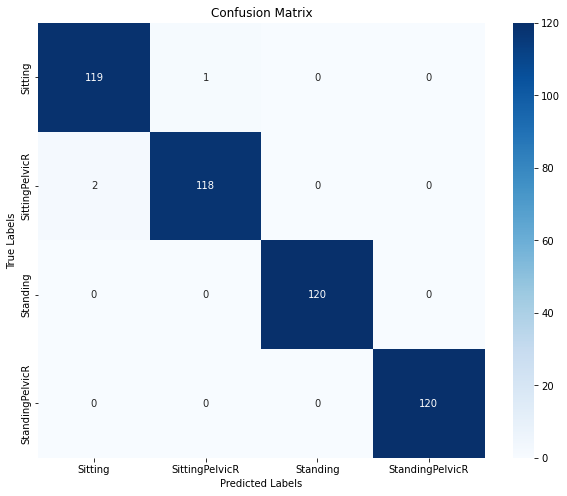

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have a test dataset with ground truth labels and model predictions
y_true = []  # True labels
y_pred = []  # Predicted labels

# Iterate over the test dataset and collect true and predicted labels
for images, labels in test_ds:
    y_true.extend(labels.numpy())  # Assuming labels are in numpy arrays
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert probabilities to labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_ResNet50.png')
plt.show()

In [15]:
model.export('resnet50_saved_model')

INFO:tensorflow:Assets written to: resnet50_saved_model\assets


INFO:tensorflow:Assets written to: resnet50_saved_model\assets


Saved artifact at 'resnet50_saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='keras_tensor_9')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2558903030880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903031936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903158208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903158912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903033696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903157152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903229600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903230128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903246688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903263824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2558903244928: TensorSpec(